In [1]:
import numpy as np
import scipy.linalg as la
import math as math
import matplotlib.pyplot as plt
from itertools import chain
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import csv
from matplotlib.legend import Legend
import matplotlib.ticker as ticker

from scipy.integrate import simpson
from numpy import trapz

st = sns.axes_style("ticks")
sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (12,12)})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})


In [2]:
def convert_sci_dec(float):
    str_float = str(float)
    e_locator = 0
    for idx, element in enumerate(str_float):
        if element == 'e':
            e_locator = idx
    
    prefactor = str_float[:e_locator]
    exponential = str_float[e_locator+2:]
    exponential_dec = '10^{%s}' % exponential
    concat_string = prefactor + ' \\times ' + exponential_dec
    
    print(prefactor, exponential_dec)

    return concat_string

###  Import Data functions

In [3]:
def obtain_dos_df(path):
    datContent = [i.strip().split() for i in open("./{}".format(path)).readlines()]
    values = datContent[1:]
    columns = datContent[0]
    df = pd.DataFrame(columns = columns)
    df_dos = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
    df_dos = df_dos.astype(float)
    return df_dos

def import_response_data(filename):
    datContent = [i.strip().split() for i in open("./{}".format(filename)).readlines()]
    values = datContent[1:]
    columns = datContent[0]
    df = pd.DataFrame(columns = columns)
    response_df = df.append(pd.DataFrame(values, columns=columns), ignore_index=True)
    response_df = response_df.astype(float)
    return response_df


In [4]:
path_data_files = "combined_data_files"
path_save_plot = "Plots"

## DOS

In [5]:
path_parent_DOS_struc1 = "DOS_files/Structure1"
path_parent_DOS_struc2 = "DOS_files/Structure2"

### DOS structure 2

In [6]:
combined_dos_df_struc2 = obtain_dos_df("{}/pto-gyrotropic-DOS-struc2.dat".format(path_parent_DOS_struc2))

### DOS structure 1

In [7]:
dos_df_0 = obtain_dos_df("{}/pto-gyrotropic-DOS-0.dat".format(path_parent_DOS_struc1))
dos_df_1 = obtain_dos_df("{}/pto-gyrotropic-DOS-1.dat".format(path_parent_DOS_struc1))
dos_df_2 = obtain_dos_df("{}/pto-gyrotropic-DOS-2.dat".format(path_parent_DOS_struc1))
dos_df_3 = obtain_dos_df("{}/pto-gyrotropic-DOS-3.dat".format(path_parent_DOS_struc1))
dos_df_4 = obtain_dos_df("{}/pto-gyrotropic-DOS-4.dat".format(path_parent_DOS_struc1))
dos_df_5 = obtain_dos_df("{}/pto-gyrotropic-DOS-5.dat".format(path_parent_DOS_struc1))
dos_df_6 = obtain_dos_df("{}/pto-gyrotropic-DOS-6.dat".format(path_parent_DOS_struc1))

In [8]:
combined_dos_df_entire = pd.concat([dos_df_0, dos_df_1, dos_df_2, dos_df_3, dos_df_4, dos_df_5, dos_df_6], ignore_index=True)
combined_dos_df_entire.drop([11, 21, 33, 47, 62, 77],axis = 0, inplace= True)
combined_dos_df_entire.to_csv("{}/DOS_combined_+P.csv".format(path_data_files), sep = " " )

### Plot DOS and obtain doped electron density

In [9]:
def plot_dos(title, df_dos):

    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20
    plt.ylabel(r"DOS [eV$^{-1}$$ \AA^{-3}$]", fontsize = fontSize)
    plt.xlabel(r'Energy [eV]',fontsize = fontSize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)


    fermi_energy = 7.890

    energies_combined = df_dos["#"] - fermi_energy
    dos_combined = df_dos["EFERMI(eV)"]
    display(df_dos)

    # Conversion factor from 1/A^3 to 1/cm^3
    conv_factor = 10**24
    doped_electron_density = [simpson(dos_combined[:-x], energies_combined[:-x])*conv_factor for x in range(1, len(energies_combined))]
    doped_electron_density = doped_electron_density[::-1]
    print("Length doped DOS: {}".format(len(doped_electron_density)))
    print("Length energies: {}".format(len(energies_combined)))

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(r'Doped el-density [cm$^{-3}]$', color=color, fontsize = fontSize )  # we already handled the x-label with ax1
    ax2.plot(energies_combined[1:], doped_electron_density, color = color , marker = '.', linestyle = '-.')
    # ax2.plot(energies_high[1:-1], doped_electron_density_high, color = color, marker = '.', linestyle = '-.')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax.legend()
    plt.savefig("{}/DOS_{}.pdf".format(path_save_plot, title))

    plt.show()
    return doped_electron_density

,#,EFERMI(eV)
0,7.880,1.089530e-08
1,7.885,1.746210e-07
2,7.890,1.766560e-06
3,7.895,1.153790e-05
4,7.900,5.034630e-05
...,...,...
88,8.290,8.539800e-03
89,8.295,8.543230e-03
90,8.300,8.385880e-03
91,8.305,8.328540e-03


Length doped DOS: 86
Length energies: 87


No handles with labels found to put in legend.


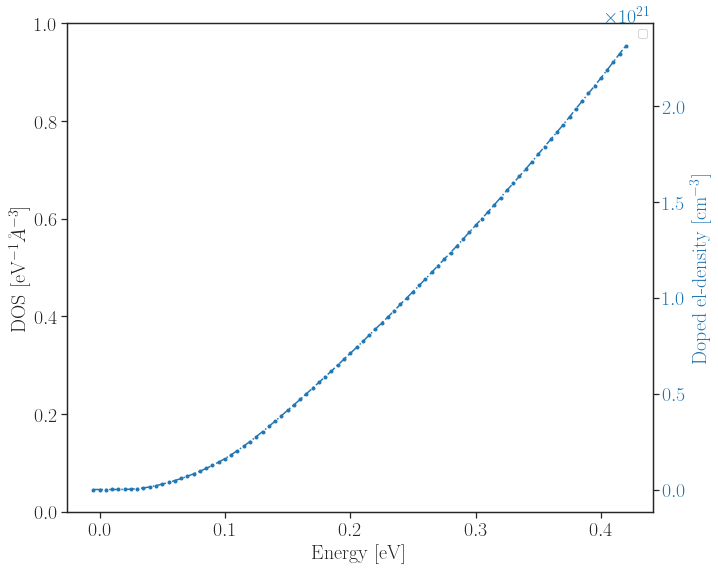

In [10]:
doped_electron_density_entire = plot_dos("structure1", combined_dos_df_entire)

## Kinetic magnetoelectric Response

In [13]:
# Define Path to KME Files
parent_path_KME_struc1 = "KME_Files/Structure1"
parent_path_KME_struc2 = "KME_Files/Structure2"

#### KME Structure 2

In [14]:
response_df_struc2 = import_response_data("{}/pto-gyrotropic-K_orb-struc2.dat".format(parent_path_KME_struc2))
response_df_spin_struc2 = import_response_data("{}/pto-gyrotropic-K_spin-struc2.dat".format(parent_path_KME_struc2))

### KME Structure 1

In [15]:
response_df_0 = import_response_data("{}/pto-gyrotropic-K_orb-0.dat".format(parent_path_KME_struc1))
response_df_spin_0 = import_response_data("{}/pto-gyrotropic-K_spin-0.dat".format(parent_path_KME_struc1))

response_df_1 = import_response_data("{}/pto-gyrotropic-K_orb-1.dat".format(parent_path_KME_struc1))
response_df_spin_1 = import_response_data("{}/pto-gyrotropic-K_spin-1.dat".format(parent_path_KME_struc1))

response_df_2 = import_response_data("{}/pto-gyrotropic-K_orb-2.dat".format(parent_path_KME_struc1))
response_df_spin_2 = import_response_data("{}/pto-gyrotropic-K_spin-2.dat".format(parent_path_KME_struc1))

response_df_3 = import_response_data("{}/pto-gyrotropic-K_orb-3.dat".format(parent_path_KME_struc1))
response_df_spin_3 = import_response_data("{}/pto-gyrotropic-K_spin-3.dat".format(parent_path_KME_struc1))

response_df_4 = import_response_data("{}/pto-gyrotropic-K_orb-4.dat".format(parent_path_KME_struc1))
response_df_spin_4 = import_response_data("{}/pto-gyrotropic-K_spin-4.dat".format(parent_path_KME_struc1))

response_df_5 = import_response_data("{}/pto-gyrotropic-K_orb-5.dat".format(parent_path_KME_struc1))
response_df_spin_5 = import_response_data("{}/pto-gyrotropic-K_spin-5.dat".format(parent_path_KME_struc1))

response_df_6 = import_response_data("{}/pto-gyrotropic-K_orb-6.dat".format(parent_path_KME_struc1))
response_df_spin_6 = import_response_data("{}/pto-gyrotropic-K_spin-6.dat".format(parent_path_KME_struc1))

In [16]:
combined_response_df = pd.concat([response_df_0[0:26], response_df_1, response_df_2, response_df_3, response_df_4, response_df_5, response_df_6], ignore_index= True)
combined_response_df.drop([36, 47, 62, 77, 92], inplace = True, axis = 0)
combined_response_df = combined_response_df.reset_index(drop=True)
combined_response_df.to_csv("{}/combined_response_orb-P.csv".format(path_data_files), sep = " ")


combined_response_df_spin = pd.concat([response_df_spin_0[0:26], response_df_spin_1, response_df_spin_2, response_df_spin_3, response_df_spin_4, response_df_spin_5, response_df_spin_6], ignore_index= True)
combined_response_df_spin.drop([36, 47, 62, 77, 92], inplace = True, axis = 0)
combined_response_df_spin = combined_response_df_spin.reset_index(drop=True)
combined_response_df_spin.to_csv("{}/combined_response_spin-P.csv".format(path_data_files), sep = " ")

## KME Struc1, Struc2 and cubic

In [17]:
def get_response_df(df):
    k_xx = df["xx"]
    k_yy = df["yy"]
    k_zz = df["zz"]

    k_xy = df["xy"] + df["z"]
    k_yx = df["xy"] - df["z"]
    k_xy = k_xy.rename('xy')
    k_yx = k_yx.rename('yx')


    k_xz = df["xz"] + df["y"]
    k_zx = df["xz"] - df["y"]
    k_xz = k_xz.rename('xz')
    k_zx = k_zx.rename('zx')

    k_yz = df["yz"] + df["x"]
    k_zy = df["yz"] - df["x"]
    k_zy = k_zy.rename('zy')
    k_yz = k_yz.rename('yz')

    df=pd.concat([k_xx,k_yy, k_zz, k_xy, k_yx, k_xz, k_zx, k_yz, k_zy], axis=1)

    return df



def get_response_matrix_slice(df_slice):
    ## This returns the matrix for a given energy value
    
    k_xx = df_slice["xx"]
    k_yy = df_slice["yy"]
    k_zz = df_slice["zz"]

    k_xy = df_slice["xy"] + df_slice["z"]
    k_yx = df_slice["xy"] - df_slice["z"]

    k_xz = df_slice["xz"] + df_slice["y"]
    k_zx = df_slice["xz"] - df_slice["y"]

    k_yz = df_slice["yz"] + df_slice["x"]
    k_zy = df_slice["yz"] - df_slice["x"]

    matrix = np.zeros((3,3), dtype = complex)

    matrix[0,0] = k_xx
    matrix[0,1] = k_xy
    matrix[0,2] = k_xz
    matrix[1,0] = k_yx
    matrix[1,1] = k_yy
    matrix[1,2] = k_yz
    matrix[2,0] = k_zx
    matrix[2,1] = k_zy
    matrix[2,2] = k_zz

    return matrix


def get_plot_info(response_df, component):
    energies = response_df["EFERMI(eV)"] 
    response = get_response_df(response_df)["{}".format(component)]
    return energies, response


def conv_to_magn(e_field, tau, response):
    conv_factor_amp_bohr = (10**4)/9.27
    const_prefactor = (1.602*10**(-19)*tau*conv_factor_amp_bohr)/(1.05457*10**(-34))
    response_refactored = const_prefactor*response
    magnetization = e_field*response_refactored
 
    return magnetization


In [18]:
def get_all_combined(df_combined_plus, df_combined_plus_spin, fermi_energy_plus, df_combined_neg, df_combined_neg_spin, fermi_energy_neg, title, xlim):

    tau = 10**(-11)
    e_field = 10**(-6)


    response_spin_xy = get_response_df(df_combined_plus_spin)["{}".format("xy")]
    response_spin_yx = get_response_df(df_combined_plus_spin)["{}".format("yx")]

    response_xy = get_response_df(df_combined_plus)["xy"]
    response_yx = get_response_df(df_combined_plus)["yx"]

    energies_plus = df_combined_plus["EFERMI(eV)"] - fermi_energy_plus
    energies_minus = df_combined_neg["EFERMI(eV)"] - fermi_energy_neg


    response_spin_xy_neg = get_response_df(df_combined_neg_spin)["{}".format("xy")]
    response_spin_yx_neg = get_response_df(df_combined_neg_spin)["{}".format("yx")]
    
    response_xy_neg = get_response_df(df_combined_neg)["xy"]
    response_yx_neg = get_response_df(df_combined_neg)["yx"]


    add_response_xy_plus = response_spin_xy + response_xy
    add_response_yx_plus = response_spin_yx + response_yx

    add_response_xy_neg = response_spin_xy_neg + response_xy_neg
    add_response_yx_neg = response_spin_yx_neg + response_yx_neg

    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (11, 11)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20

    conv_to_nm3 = 1000
    # conv_to_nm3 = 1

    plt.ylabel(r'$\tilde{\kappa}_{ij}$ [Amp]', fontsize = fontSize)
    plt.xlabel(r'$E - E_F$ [eV]',fontsize = fontSize)

    lineStyle1 = '--'
    lineStyle2 = '-'
    # lineStyle2 = 'dotted'
    marker_style = '.'
    marker_style2 = 'x'

    color1 = 'b'
    color2 = 'r'

    cubic = add_response_xy_plus*0

    plt.plot(energies_plus, add_response_xy_plus, color = color1, label = r'$\tilde{\kappa}_{xy}$, $m_l + m_s$ for $-P$', marker = marker_style,linestyle =  lineStyle2)
    plt.plot(energies_plus, add_response_yx_plus, color = color2, label = r'$\tilde{\kappa}_{yx}$,  $m_l + m_s$ for $-P$', marker = marker_style, linestyle = lineStyle2)
    plt.plot(energies_minus, add_response_xy_neg, color= color1, label = r'$\tilde{\kappa}_{xy}$, $m_l + m_s$ for $+P$', marker = marker_style2, linestyle = lineStyle1)
    plt.plot(energies_minus, add_response_yx_neg, color = color2, label = r'$\tilde{\kappa}_{yx}$, $m_l + m_s$ for $+P$', marker = marker_style2, linestyle = lineStyle1) 

    plt.plot(energies_plus, cubic, color = 'g', label = r'$\tilde{\kappa}_{yx} \; \& \; \tilde{\kappa}_{yx}$, $m_l + m_s$ for cubic', marker = marker_style)


    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)

    ax2 = ax.twinx()
    mag_xy = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in add_response_xy_plus]
    mag_yx = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in add_response_yx_plus]

    print(energies_plus)
    print(mag_yx)

    mag_xy_neg = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in add_response_xy_neg]
    mag_yx_neg = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in add_response_yx_neg]

    color = 'tab:blue'
    ax2.set_ylabel(r'Magnetization [$\mu_B$ nm$^{-3}]$', color=color, fontsize = fontSize) 
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 


    ax.set_xlim(xlim[0], xlim[1])
    ax.legend(fontsize=ticksize, loc = "upper left")
    # plt.savefig("DOS_{}.pdf".format(title))

    plt.tight_layout()
    plt.savefig("{}/{}".format(path_save_plot, title))
    plt.show()


0    -0.089
1    -0.084
2    -0.079
3    -0.074
4    -0.069
      ...  
94    0.381
95    0.386
96    0.391
97    0.396
98    0.401
Name: EFERMI(eV), Length: 99, dtype: float64
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4315899530454183e-15, -2.0459570449705214e-13, -1.2194315859594362e-11, -4.3628268688208724e-10, -9.356360724119738e-09, -1.2028906507331798e-07, -9.263177762933054e-07, -4.230627002180339e-06, -1.0806319311114797e-05, -9.925584869957125e-06, 3.0482148676803884e-05, 0.0001488831505778226, 0.0003538263366129719, 0.0006167388219355223, 0.0009071798353385833, 0.001212065593386381, 0.001536340795371343, 0.0018789334957891545, 0.002233590432132141, 0.0026229976226448894, 0.0030487479366687995, 0.003526948062029792, 0.004043473668474455, 0.004468308825618981, 0.004942042743204311, 0.005718370096365602, 0.006397054651290717, 0.006715532362180289, 0.007219172153358231, 0.007983686983596406, 0.008422762177120737, 0.008631355233067435, 0.009263980471317115, 0

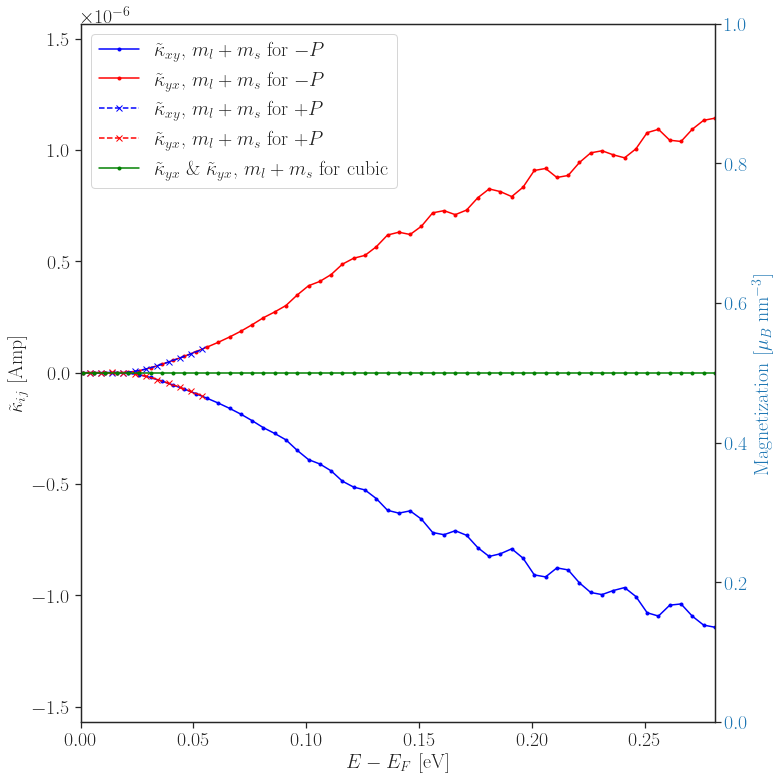

In [19]:
fermi_energy_plus = 7.889
fermi_energy_neg =7.886
get_all_combined(df_combined_plus = combined_response_df, df_combined_plus_spin = combined_response_df_spin, fermi_energy_plus = fermi_energy_plus, 
                df_combined_neg = response_df_struc2, df_combined_neg_spin = response_df_spin_struc2, fermi_energy_neg = fermi_energy_neg,
                title = "KME_combined.pdf", xlim = [0, 0.281])

### Reduced x Range

8    -0.049
9    -0.044
10   -0.039
11   -0.034
12   -0.029
13   -0.024
14   -0.019
15   -0.014
16   -0.009
17   -0.004
18    0.001
19    0.006
20    0.011
21    0.016
22    0.021
23    0.026
24    0.031
25    0.036
26    0.041
27    0.046
28    0.051
Name: EFERMI(eV), dtype: float64
[0.0, 0.0, 0.0, 0.0, -3.4315899530454183e-15, -2.0459570449705214e-13, -1.2194315859594362e-11, -4.3628268688208724e-10, -9.356360724119738e-09, -1.2028906507331798e-07, -9.263177762933054e-07, -4.230627002180339e-06, -1.0806319311114797e-05, -9.925584869957125e-06, 3.0482148676803884e-05, 0.0001488831505778226, 0.0003538263366129719, 0.0006167388219355223, 0.0009071798353385833, 0.001212065593386381, 0.001536340795371343]


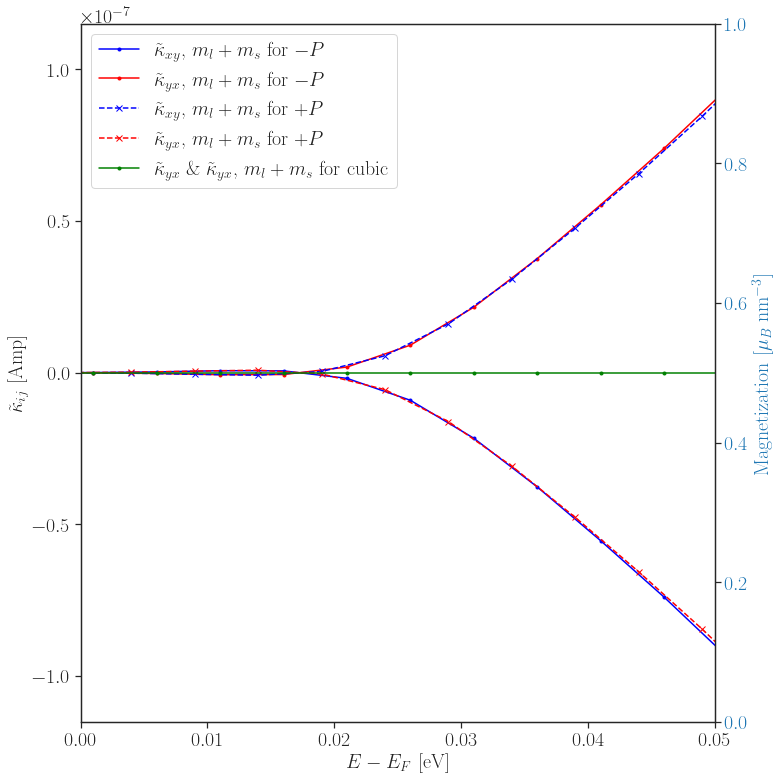

In [21]:
get_all_combined(combined_response_df[8:29], combined_response_df_spin[8:29], fermi_energy_plus, response_df_struc2, response_df_spin_struc2, fermi_energy_neg, title = "KME_combined_reduced.pdf", xlim = [0, 0.05])

## KME orb+spin

In [27]:
def get_added_orb_spin(df_spin, df_orb, e_field, tau, doped_e_density, energies, xlim):

    fermi_energy = 7.890

    # Response contributions
    response_spin_xy = get_response_df(df_spin)["{}".format("xy")]
    response_spin_yx = get_response_df(df_spin)["{}".format("yx")]
    response_xy = get_response_df(df_orb)["xy"]
    response_yx = get_response_df(df_orb)["yx"]

    energies_orb = df_orb["EFERMI(eV)"] - fermi_energy
    energies_spin = df_spin["EFERMI(eV)"] - fermi_energy


    add_response_xy = response_spin_xy + response_xy
    add_response_yx = response_spin_yx + response_yx

    conv_to_nm3 = 1000

    cubic = energies_orb*0

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20

    lineStyle = 'solid'


    ax.plot(energies_orb, add_response_xy, color = 'r', label = r'$\tilde{\kappa}_{xy}$, $m_l + m_s$ for $-P$', linestyle = lineStyle, marker = '.')
    ax.plot(energies_orb, add_response_yx, color = 'b', label = r'$\tilde{\kappa}_{yx}$, $m_l + m_s$ for $-P$', linestyle = lineStyle, marker = '.')

    ax.set_ylabel(r'$\tilde{\kappa}_{ij}$ [Amp]', fontsize = fontSize)
    ax.set_xlabel(r'$E - E_F$ [eV]',fontsize = fontSize)

    ax.set_xlim(xlim[0], xlim[1])

    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize - 3)
   

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax3 = ax.twiny()

    mag_xy = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in add_response_xy]
    mag_yx = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in add_response_yx]


    doped_density_rounded = ['{:.3g}'.format(doped_e_density[x]) for x in range(0, len(doped_e_density))]
    doped_density_rounded = [r'${}$'.format(convert_sci_dec(doped_density_rounded[x]))for x in range(1, len(doped_density_rounded))];
    print("Doped electron density rounded: {}".format(doped_density_rounded))

    tick_spacing = 0.01

    color_blue = 'tab:blue'
    color  = 'black'

    energies_cut = energies[2:]
    dens_energies = [value for index, value in enumerate(energies_cut) if index % 4 == 1]
    doped_density_rounded_cut = [value for index, value in enumerate(doped_density_rounded) if index % 4 == 1]

    ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax3.set_xticks(ticks = dens_energies)

    ax3.set_xticklabels(labels = doped_density_rounded_cut, rotation = 45)
    ax3.set_xlim(xlim[0], xlim[1])
    ax3.set_xlabel(r'Doped el-density [cm$^{-3}]$', color=color_blue, fontsize = fontSize )

    ax3.tick_params(axis='x', labelcolor=color_blue, pad=13)
    plt.tick_params(axis='both', which='major', labelsize=ticksize-7)
    

    ax2.set_ylabel(r'Magnetization [$\mu_B$ nm$^{-3}]$', color=color_blue, fontsize = fontSize )  
    ax2.plot(energies_orb, mag_xy , color = 'r' , marker = '.', linestyle = lineStyle)
    ax2.plot(energies_orb, mag_yx , color = 'b' , marker = '.', linestyle = lineStyle)
    ax2.tick_params(axis='y', labelcolor=color_blue)

    ax2.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize)
   
    ax.legend(fontsize=ticksize)
    fig.tight_layout()
    plt.savefig("{}/KME_added_structure1.pdf".format(path_save_plot))
    plt.show()

4.64 10^{14}
4.13 10^{15}
3.46 10^{16}
1.68 10^{17}
6.61 10^{17}
1.86 10^{18}
4.28 10^{18}
8.16 10^{18}
1.35 10^{19}
2.02 10^{19}
2.8 10^{19}
3.69 10^{19}
4.67 10^{19}
5.74 10^{19}
6.9 10^{19}
8.16 10^{19}
9.51 10^{19}
1.1 10^{20}
1.26 10^{20}
1.43 10^{20}
1.61 10^{20}
1.81 10^{20}
2.03 10^{20}
2.26 10^{20}
2.5 10^{20}
2.76 10^{20}
3.02 10^{20}
3.29 10^{20}
3.56 10^{20}
3.84 10^{20}
4.13 10^{20}
4.41 10^{20}
4.7 10^{20}
4.99 10^{20}
5.29 10^{20}
5.59 10^{20}
5.88 10^{20}
6.18 10^{20}
6.49 10^{20}
6.8 10^{20}
7.1 10^{20}
7.41 10^{20}
7.72 10^{20}
8.04 10^{20}
8.36 10^{20}
8.68 10^{20}
8.99 10^{20}
9.32 10^{20}
9.65 10^{20}
9.99 10^{20}
1.03 10^{21}
1.06 10^{21}
1.1 10^{21}
1.13 10^{21}
1.17 10^{21}
1.2 10^{21}
1.24 10^{21}
1.27 10^{21}
1.31 10^{21}
1.34 10^{21}
1.38 10^{21}
1.41 10^{21}
1.45 10^{21}
1.48 10^{21}
1.52 10^{21}
1.56 10^{21}
1.6 10^{21}
1.63 10^{21}
1.67 10^{21}
1.71 10^{21}
1.75 10^{21}
1.79 10^{21}
1.83 10^{21}
1.86 10^{21}
1.9 10^{21}
1.94 10^{21}
1.98 10^{21}
2.03 10^{2

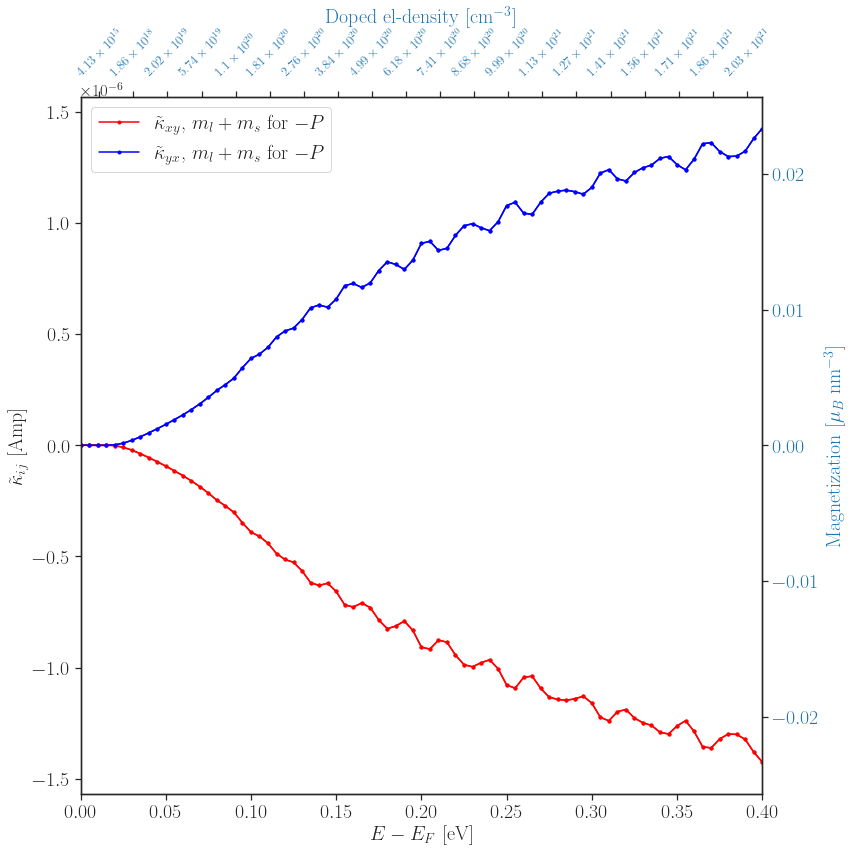

In [28]:
get_added_orb_spin(df_orb = combined_response_df , df_spin = combined_response_df_spin, tau= 10**(-11), e_field = 10**(-6), doped_e_density= doped_electron_density_entire, energies = combined_dos_df_entire["#"][1:] -fermi_energy_plus , xlim = [0, 0.4])

# Plots KME-DOS

In [24]:
def get_DOS_KME_plot(df_orb, df_spin, dos_df, tau, e_field, title, fermi_energy, xlim):

    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (12,12)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fontSize = 20
    ticksize = 20

    ''' Response contributions '''
    response_spin_xy = get_response_df(df_spin)["{}".format("xy")]
    response_spin_yx = get_response_df(df_spin)["{}".format("yx")]
    response_xy = get_response_df(df_orb)["xy"]
    response_yx = get_response_df(df_orb)["yx"]

    energies_orb = df_orb["EFERMI(eV)"] - fermi_energy
    energies_spin = df_spin["EFERMI(eV)"] - fermi_energy

    ''' DOS contributions '''
    dos_combined = dos_df["EFERMI(eV)"]
    energies_combined = dos_df["#"] - fermi_energy

    conv_factor = 10**24
    doped_electron_density = [simpson(dos_combined[:-x], energies_combined[:-x])*conv_factor for x in range(1, len(energies_combined))]
    doped_electron_density = doped_electron_density[::-1]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    ax1.tick_params(axis='both', which='major', labelsize=ticksize)
    ax1.yaxis.get_offset_text().set_fontsize(ticksize)

    ax1.plot(energies_orb, response_xy, color = 'r', label = r'$m_l$ for $\tilde{\kappa}_{xy}$')
    ax1.plot(energies_orb, response_yx, color = 'b', label = r'$m_l$ for $\tilde{\kappa}_{yx}$')
    ax1.plot(energies_spin, response_spin_xy, color = 'r', label = r'$m_s$ for $\tilde{\kappa}_{xy}$', linestyle = '--')
    ax1.plot(energies_spin, response_spin_yx, color = 'b', label = r'$m_s$ for $\tilde{\kappa}_{yx}$', linestyle = '--')

    ax1.set_ylabel(r'$\tilde{\kappa}_{ij}$ [Amp]', fontsize = fontSize)

    ax1.set_xlim(xlim[0], xlim[1])

    # conv_to_nm3 = 1000
    conv_to_nm3 = 1

    ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax3.tick_params(axis='both', which='major', labelsize=ticksize)

    mag_xy = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_xy]
    mag_yx = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_yx]
    mag_xy_spin = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_spin_xy]
    mag_yx_spin = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_spin_yx]

    print("Magnetization xy: {}".format(mag_yx))
    print("Magnetization spin xy: {}".format(mag_xy_spin))

    # PLOT THE SECOND CONTRIBUTION (Y_AXIS representing the MAGNETIZATION)

    color = 'tab:blue'
    ax3.set_ylabel(r'Magnetization [$\mu_B$ nm$^{-3}]$', color=color, fontsize = fontSize )  
    ax3.plot(energies_orb, mag_xy , color = 'r' , marker = '.', linestyle = '-.')
    ax3.plot(energies_orb, mag_yx , color = 'b' , marker = '.', linestyle = '-.')
    ax3.plot(energies_spin, mag_xy_spin , color = 'r' , marker = '.', linestyle = '-.')
    ax3.plot(energies_spin, mag_yx_spin , color = 'b' , marker = '.', linestyle = '-.')
    ax3.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 


    ax1.legend(fontsize=ticksize, loc = 'upper left')


    ax2.set_ylabel(r"DOS [eV$^{-1}$$ \AA^{-3}$]", fontsize = fontSize)
    ax2.set_xlabel(r'$E - E_F$ [eV]',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')
    ax2.tick_params(axis='both', which='major', labelsize=ticksize)

    ax2.plot(energies_combined, dos_combined, linestyle = '-', marker = '.', color = 'black')
    ax4 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax4.set_ylabel(r'Doped el-density [cm$^{-3}]$', color=color, fontsize = fontSize )  # we already handled the x-label with ax1
    ax4.plot(energies_combined[1:], doped_electron_density, color = color , marker = '.', linestyle = '-.')
    ax4.tick_params(axis='y', labelcolor=color)


    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax4.legend()

    fig.tight_layout()
    plt.savefig("{}/KME_DOS_{}.pdf".format(path_save_plot, title))
    plt.show()

Magnetization xy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.834432349718576e-19, 3.9632092686376285e-17, 2.7125883105219988e-15, 1.1358122098594275e-13, 2.9481183723619555e-12, 4.80162328850548e-11, 5.000560418855668e-10, 3.4260449304557113e-09, 1.6071304911742886e-08, 5.424116925897465e-08, 1.387561088304431e-07, 2.8225952873075493e-07, 4.783588664997679e-07, 7.094700944414743e-07, 9.621484345664838e-07, 1.2328147189794654e-06, 1.5218839609315756e-06, 1.824142523373305e-06, 2.1432350840645395e-06, 2.4789082150724297e-06, 2.8326342856716734e-06, 3.238756886601091e-06, 3.681145365741027e-06, 4.099848200771289e-06, 4.542842308580011e-06, 5.102255663933701e-06, 5.723493228004127e-06, 6.269993542888829e-06, 6.7290383491877385e-06, 7.22647447942478e-06, 7.757405998745544e-06, 8.1537584939373e-06, 8.487950472078482e-06, 8.950624915874697e-06, 9.365133344828993e-06, 9.54093346471405e-06, 9.737941850996923e-06, 1.0182459785836423e-05, 1.0628510288691723e-05, 1.078874359423

No handles with labels found to put in legend.


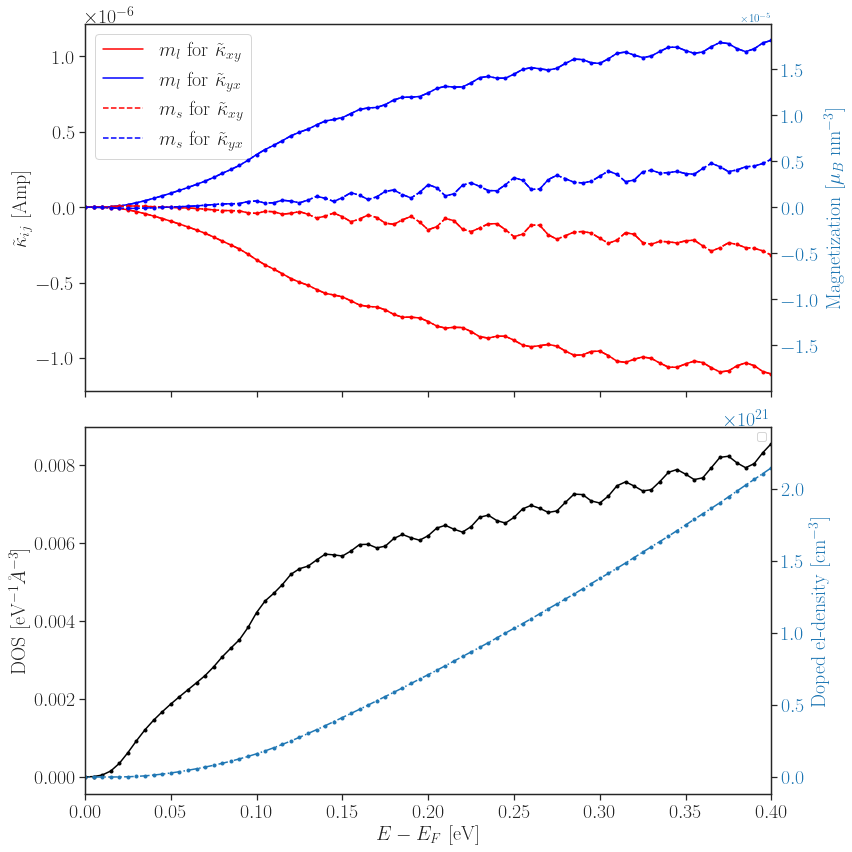

In [25]:
get_DOS_KME_plot(df_orb = combined_response_df , df_spin = combined_response_df_spin, dos_df = combined_dos_df_entire, tau = 10**(-11), e_field = 10**(-6), title = "structure1", fermi_energy = 7.890, xlim = [0, 0.4])

## DOS - KME plot for structure 2

No handles with labels found to put in legend.


Magnetization xy: [0.0, 0.0, 0.0, 0.0, -7.589125746806479e-18, -6.248387142976693e-16, -3.104367652789234e-14, -9.531725605385935e-13, -1.828140132627931e-11, -2.2261628122060705e-10, -1.764542189414523e-09, -9.435880135898579e-09, -3.565668006528405e-08, -1.0024854268822215e-07, -2.2023424051969464e-07, -3.959211895245391e-07, -6.117582824085757e-07, -8.520750998736798e-07, -1.1096919479075402e-06, -1.3845286546018711e-06, -1.6730572448348016e-06]
Magnetization spin xy: [0.0, 0.0, 0.0, 0.0, -4.9197789143727745e-17, -3.644933403872982e-15, -1.6068625123035932e-13, -4.289336661588752e-12, -6.979874272878534e-11, -7.003113717888605e-10, -4.415325733569593e-09, -1.799709751024459e-08, -4.919638462770129e-08, -9.374573656511728e-08, -1.287796302699734e-07, -1.3200705444654154e-07, -1.0653708194168496e-07, -7.010380159868225e-08, -3.379772108911828e-08, 8.18586299794947e-10, 4.078652341197181e-08]


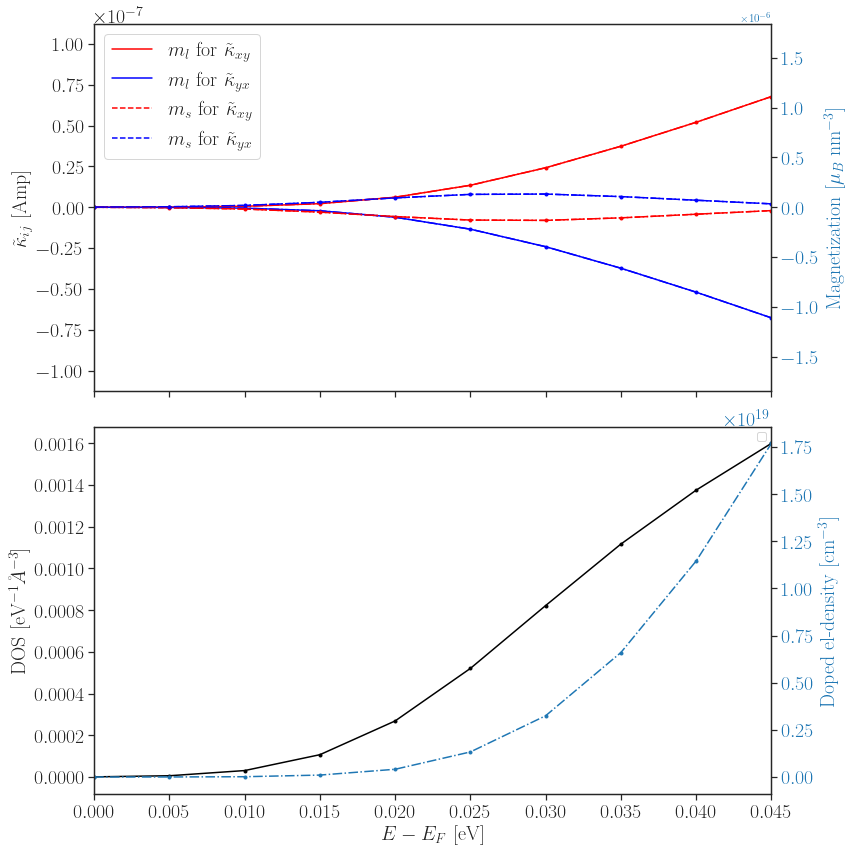

In [26]:
get_DOS_KME_plot(df_orb = response_df_struc2 , df_spin = response_df_spin_struc2, dos_df = combined_dos_df_struc2, tau = 10**(-11), e_field = 10**(-6), title = "structure2", fermi_energy= 7.885, xlim = [0, 0.045])